# Problem Statement

We have a client who has a website where people write different reviews for technical products.
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating)
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars,
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the
past and they don’t have a rating. So, we have to build an application which can predict the rating
by seeing the review.

# Data Collection Phase

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you.
more the data better the model
In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart
watches, Professional Cameras, Printers, Monitors, Home theater, Router from different ecommerce
websites.
Basically, we need these columns-
1) reviews of the product.
2) rating of the product.
You can fetch other data as well, if you think data can be useful or can help in the project. It
completely depends on your imagination or assumption

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
#read excel file first
ratings=pd.read_csv(r"C:\Users\win8\Desktop\ratings2.csv")
ratings.head()

,review,rating
0,I bought this the day it launched. The very mo...,5
1,"1) When touch to ear while speaking, sensor ma...",4
2,"this product is good, its fingerprint sensor i...",4
3,I am writing this review after 10 days.1.CAMER...,5
4,This is the best thing you can get in this pri...,5


In [4]:
ratings.shape

(33758, 2)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33758 entries, 0 to 33757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  33758 non-null  object
 1   rating  33758 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.6+ KB


In [6]:
ratings.isnull().sum()

review    0
rating    0
dtype: int64

In [7]:
ratings.describe()

,rating
count,33758.000000
mean,4.421944
std,1.022510
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# This problem belongs Natural Language Processing, so we have to import its libraries


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
import string
import re

# Univariate Analysis

In [9]:
ratings['rating'].value_counts()

5    22394
4     7036
3     2064
1     1558
2      706
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

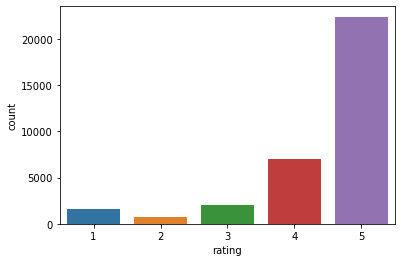

In [10]:
sns.countplot(ratings['rating'])

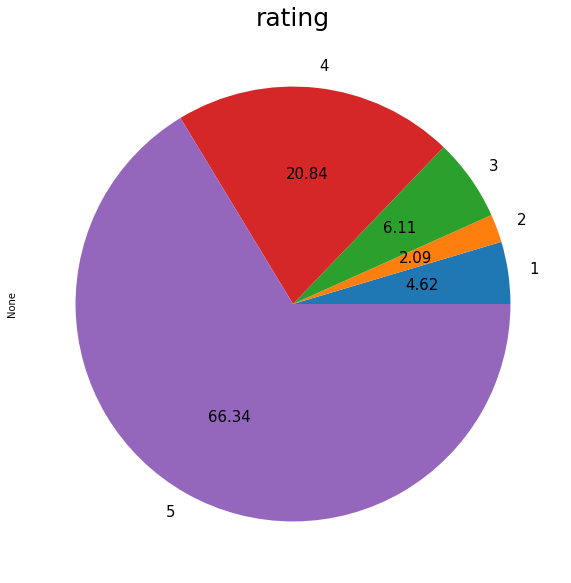

In [11]:
plt.figure(figsize=(15,10))
ratings.groupby('rating').size().plot(kind='pie', autopct='%.2f',fontsize=15)
plt.title('rating',fontsize=25)
plt.show()

<AxesSubplot:>

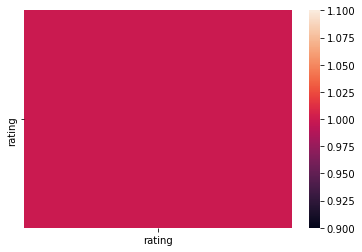

In [12]:
## checking correlation in dataset
ratings.corr()
sns.heatmap(ratings.corr())

In [13]:
ratings['length'] = ratings['review'].str.len()
ratings

,review,rating,length
0,I bought this the day it launched. The very mo...,5,2874
1,"1) When touch to ear while speaking, sensor ma...",4,607
2,"this product is good, its fingerprint sensor i...",4,685
3,I am writing this review after 10 days.1.CAMER...,5,1365
4,This is the best thing you can get in this pri...,5,558
...,...,...,...
33753,Excellent band never I have saw tq flip kart b...,4,98
33754,NiceREAD MORE,5,13
33755,It was really awesom the battery is really lit...,5,55
33756,Product is good super working but charging is ...,3,73


In [14]:
# Convert all messages to lower case
ratings['comment_text'] = ratings['review'].str.lower()

# Replace email addresses with ''
ratings['comment_text'] = ratings['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','')

# Replace URLs with ''
ratings['comment_text'] = ratings['review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  '')

# Replace money symbols with '' 
ratings['comment_text'] = ratings['review'].str.replace(r'£|\$', '')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'p'
ratings['comment_text'] = ratings['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  '')

    
# Replace numbers with 'num'
ratings['comment_text'] = ratings['review'].str.replace(r'\d+(\.\d+)?', 'num')


ratings['comment_text'] = ratings['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
ratings['review'] = ratings['review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
ratings['review'] = ratings['review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [15]:
ratings['clean_length'] = ratings.comment_text.str.len()
ratings.head()

,review,rating,length,comment_text,clean_length
0,I bought day launched. The moment available sa...,5,2874,I bought this the day it launched. The very mo...,2872
1,"1) When touch ear speaking, sensor malfunction...",4,607,"1) When touch to ear while speaking, sensor ma...",607
2,"product good, fingerprint sensor quite good, i...",4,685,"this product is good, its fingerprint sensor i...",684
3,I writing review 10 days.1.CAMERAI found rare ...,5,1365,I am writing this review after 10 days.1.CAMER...,1365
4,This best thing get price range & NOT China ma...,5,558,This is the best thing you can get in this pri...,556


In [16]:

# Total length removal
print ('Origian Length', ratings.length.sum())
print ('Clean Length', ratings.clean_length.sum())

Origian Length 2467261
Clean Length 2458443


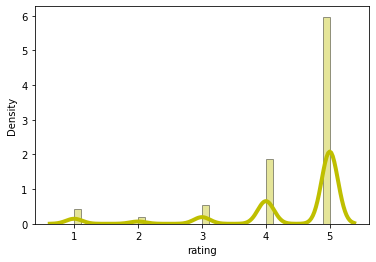

In [17]:
# density plot and histogram of Review word count
sns.distplot(ratings['rating'], hist = True, kde = True,
            bins = int(180/5), color = 'y',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

In [18]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(ratings[['rating']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
ratings = ratings[filtering_entry]
ratings.shape

(32200, 5)

In [19]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [20]:

from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

In [21]:
ratings.shape

(32200, 5)

In [22]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(ratings['review'])
x = features

In [23]:
y=ratings['rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [24]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(y_train)))

The number of classes before fitCounter({5: 15592, 4: 5002, 3: 1453, 2: 493})


In [25]:
os=SMOTE(sampling_strategy = {2: 493, 3: 1453, 4: 5002, 5: 15592})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)

In [26]:

y_train.shape,y_test.shape

((22540,), (9660,))

In [27]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7431233362910381
Test accuracy is 0.7179089026915114
[[  11   34   41  127]
 [   7   66   83  455]
 [   2   42  228 1762]
 [   0   23  149 6630]]
              precision    recall  f1-score   support

           2       0.55      0.05      0.09       213
           3       0.40      0.11      0.17       611
           4       0.46      0.11      0.18      2034
           5       0.74      0.97      0.84      6802

    accuracy                           0.72      9660
   macro avg       0.54      0.31      0.32      9660
weighted avg       0.65      0.72      0.64      9660



In [28]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.889751552795031
Test accuracy is 0.715631469979296
[[  61   38   48   66]
 [  26  189   94  302]
 [  20   90  602 1322]
 [  37  127  577 6061]]
              precision    recall  f1-score   support

           2       0.42      0.29      0.34       213
           3       0.43      0.31      0.36       611
           4       0.46      0.30      0.36      2034
           5       0.78      0.89      0.83      6802

    accuracy                           0.72      9660
   macro avg       0.52      0.45      0.47      9660
weighted avg       0.68      0.72      0.69      9660



In [29]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.889751552795031
Test accuracy is 0.7538302277432712
[[  56   21   27  109]
 [   9  174   48  380]
 [   7   22  434 1571]
 [   6   27  151 6618]]
              precision    recall  f1-score   support

           2       0.72      0.26      0.38       213
           3       0.71      0.28      0.41       611
           4       0.66      0.21      0.32      2034
           5       0.76      0.97      0.86      6802

    accuracy                           0.75      9660
   macro avg       0.71      0.43      0.49      9660
weighted avg       0.74      0.75      0.70      9660



In [30]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.6982253771073647
Test accuracy is 0.7053830227743271
[[  18   52    4  139]
 [  16   63   34  498]
 [  20   57   73 1884]
 [  22   34   86 6660]]
              precision    recall  f1-score   support

           2       0.24      0.08      0.12       213
           3       0.31      0.10      0.15       611
           4       0.37      0.04      0.07      2034
           5       0.73      0.98      0.83      6802

    accuracy                           0.71      9660
   macro avg       0.41      0.30      0.29      9660
weighted avg       0.61      0.71      0.61      9660



In [31]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.7106921029281278
Test accuracy is 0.6935817805383023
[[  17   17   14  165]
 [  38   45   42  486]
 [  27   39  113 1855]
 [  40   36  201 6525]]
              precision    recall  f1-score   support

           2       0.14      0.08      0.10       213
           3       0.33      0.07      0.12       611
           4       0.31      0.06      0.09      2034
           5       0.72      0.96      0.82      6802

    accuracy                           0.69      9660
   macro avg       0.37      0.29      0.29      9660
weighted avg       0.60      0.69      0.61      9660



# Cross Validation Score

In [32]:
# Defning function cross_val to find cv score of models
def cross_val(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    scores = cross_val_score(model,x,y, cv = 3).mean()*100
    print("Cross validation score :", scores)
for model in [LG,DT,RF,ada,knn]:
    cross_val(model)

******************************LogisticRegression******************************
Cross validation score : 68.87893998677743
******************************DecisionTreeClassifier******************************
Cross validation score : 63.257813187117584
******************************RandomForestClassifier******************************
Cross validation score : 68.05593942639399
******************************AdaBoostClassifier******************************
Cross validation score : 68.56215909455796
******************************KNeighborsClassifier******************************
Cross validation score : 66.06221454497904


# Hyperparameter Tuning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
params={'n_estimators':[10,12,13],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       }

In [35]:
Grid_RF=GridSearchCV(RF,param_grid=params,cv=5)
Grid_RF.fit(x_train,y_train)
Grid_RF.best_params_

{'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 10}

In [36]:
Final_RF=RandomForestClassifier(max_depth=10,min_samples_leaf= 5,n_estimators=10)
Final_RF.fit(x_train,y_train)
final_pred=Final_RF.predict(x_test)
final_score=accuracy_score(y_test,final_pred)
print(final_score*100)

70.41407867494824


In [37]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 15)  #random forest

Weight,Feature
0.0243 ± 0.0062,good
0.0206 ± 0.0056,read
0.0129 ± 0.0038,product
0.0115 ± 0.0040,battery
0.0114 ± 0.0041,nice
0.0112 ± 0.0054,small
0.0097 ± 0.0047,goodread
0.0096 ± 0.0042,sound
0.0091 ± 0.0049,awesome
0.0084 ± 0.0033,phone


In [38]:
import joblib
joblib.dump(RF,"Rating prediction using NLP.pkl")

['Rating prediction using NLP.pkl']